# WITH PANDAS AND MATPLOTLIB

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
kill = pd.read_csv('PoliceKillingsUS.csv',encoding="windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


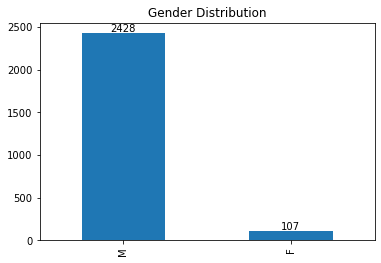

In [15]:
# with pandas

fig, ax = plt.subplots()

x = [0,1]  # sıfırıncı M ve birinci nin F olduğunu belirtir.
y= kill.gender.value_counts().values

kill.gender.value_counts().plot.bar( ax = ax )
ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center",va="bottom")

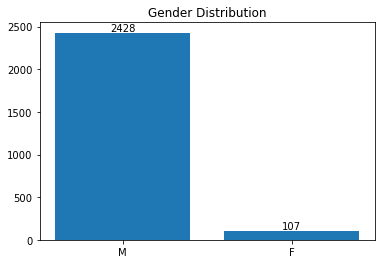

In [14]:
# with matplotlib

fig, ax = plt.subplots()

x = kill.gender.value_counts().index
y = kill.gender.value_counts().values

ax.bar(x,y )
ax.set_title("Gender Distribution")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center",va="bottom")


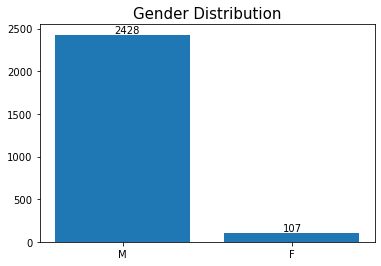

In [17]:
# Alternatif çözümler

fig, ax = plt.subplots()

ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

## 2: Plot 7 most common kill weapons

In [20]:
arm = df.armed.value_counts()[:7]
arm

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

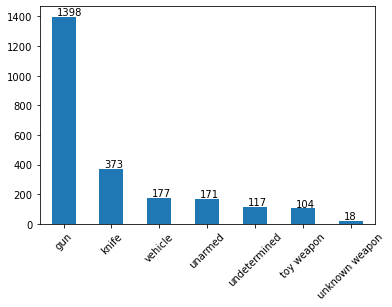

In [26]:
# with pandas

fig, ax = plt.subplots()

arm.plot(kind="bar", ax = ax)

ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

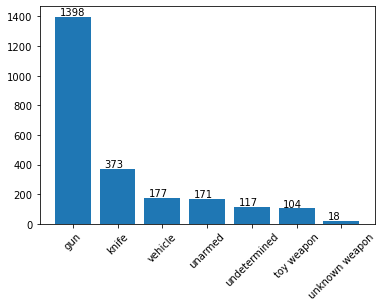

In [28]:
# with matplotlib

fig, ax = plt.subplots()

x = arm.index
y = arm.values

ax.bar(x,y)

ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [43]:
kill["age_cat"] = df.age.apply(lambda x: "above 25" if x > 25 else "below 25")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below 25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25


In [45]:
under = kill[kill["age"]<=25].count()
under[0]

553

In [46]:
upper = kill[kill["age"]>25].count()
upper[0]

1905

In [37]:
# kill['age_cat'] = kill['age'].apply(lambda x: 'above25' if x>25 else ('below25' if  x<25 else "other"))

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531     True
2532    False
2533    False
2534    False
Name: age, Length: 2535, dtype: bool

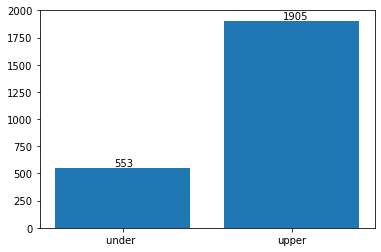

In [49]:
x = [under[0],upper[0]]
y=["under ", "upper"]
fig , ax = plt.subplots()
ax.bar(y,x)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

## 4: Plot number of killed poeple by race

In [61]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

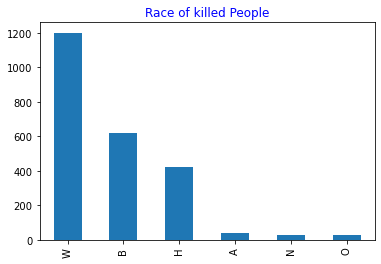

In [62]:
# with pandas
kill.race.value_counts().plot.bar()
plt.title('Race of killed People', color="blue");

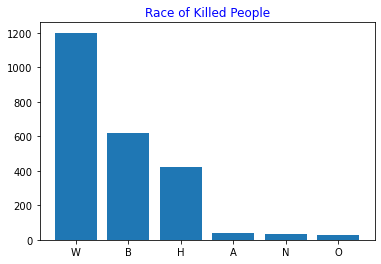

In [63]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.race.value_counts().index,kill.race.value_counts().values);
ax.set_title('Race of Killed People', color="blue");


## 5: Killed People According to Races (Pie Chart)

In [50]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below 25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25


In [51]:
kill.race.values

array(['A', 'W', 'H', ..., nan, 'B', 'B'], dtype=object)

In [52]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [53]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

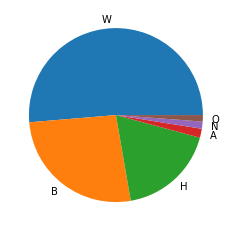

In [56]:
fig, ax = plt.subplots()

x = kill.race.value_counts().values
label = kill.race.value_counts().index

ax.pie(x, labels = label);

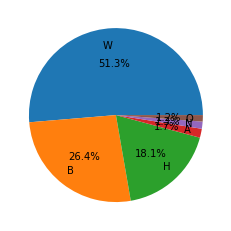

In [57]:
fig, ax = plt.subplots()

x = kill.race.value_counts().values
label = kill.race.value_counts().index

ax.pie(x, labels = label, labeldistance = 0.8, autopct = "%.1f%%");

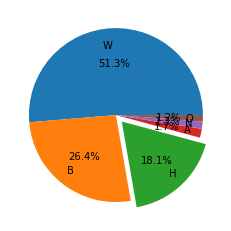

In [59]:
fig, ax = plt.subplots()

x = kill.race.value_counts().values
label = kill.race.value_counts().index

ax.pie(x, labels = label, labeldistance = 0.8, autopct = "%.1f%%", explode = [0,0,0.1,0,0,0]);

Problem: missing value on race column.